<a href="https://colab.research.google.com/github/cjgooutside/main/blob/main/Day3_OU_PredictiveAnalytics_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 3 CP2: Observation Unit Case Exercise: Predictive Analytics
QTM7515 Reinforcement Learning, Dessislava A. Pachamanova

In [ ]:
# Import necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mount google drive so that your file folders are accessible to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read in and preprocess data

In [ ]:
# Read in csv file and store into a dataframe called df
df = pd.read_csv("/content/drive/My Drive/QTM7515RL/OUDataClean.csv", sep=',')

In [ ]:
# Check that the file was read in correctly
# View the first 5 rows
print("First 5 rows:")
display(df.head())

# View the last 3 rows
print("\nLast 3 rows:")
display(df.tail(3))

# View 2 random rows
print("\n2 random rows:")
display(df.sample(2))

First 5 rows:


,ObservationRecordKey,Age,Gender,PrimaryInsuranceCategory,InitPatientClassAndFirstPostOUClass,Flipped,OU_LOS_hrs,DRG01,BloodPressureUpper,BloodPressureLower,BloodPressureDiff,Pulse,PulseOximetry,Respirations,Temperature
0,905459x1,54,Male,MEDICAID STATE,OBSERVATION->INPATIENT,1,37.3,428,153,111,26,73,100,18,98.2
1,443621z2,89,Female,MEDICARE,OBSERVATION->OBSERVATION,0,89.7,599,123,64,68,86,94,18,95.9
2,131565z1,83,Female,MEDICARE,OBSERVATION->INPATIENT,1,96.3,786,105,55,29,81,94,18,97.3
3,438080x1,89,Female,MEDICARE,OBSERVATION->OBSERVATION,0,13.3,780,162,73,83,76,97,24,98.1
4,763005z1,81,Female,MEDICARE OTHER,OBSERVATION->OBSERVATION,0,25.4,428,102,60,49,67,99,10,98.6



Last 3 rows:


,ObservationRecordKey,Age,Gender,PrimaryInsuranceCategory,InitPatientClassAndFirstPostOUClass,Flipped,OU_LOS_hrs,DRG01,BloodPressureUpper,BloodPressureLower,BloodPressureDiff,Pulse,PulseOximetry,Respirations,Temperature
1096,141193z1,80,Female,MEDICARE OTHER,OBSERVATION->OBSERVATION,0,28.7,789,145,78,62,69,98,20,98.1
1097,928081x4,37,Female,MEDICAID OTHER,OBSERVATION->OBSERVATION,0,67.1,789,169,75,54,70,95,10,99.9
1098,774162z1,50,Female,MEDICAID STATE,OBSERVATION->OBSERVATION,0,20.8,789,92,51,78,55,100,13,97.7



2 random rows:


,ObservationRecordKey,Age,Gender,PrimaryInsuranceCategory,InitPatientClassAndFirstPostOUClass,Flipped,OU_LOS_hrs,DRG01,BloodPressureUpper,BloodPressureLower,BloodPressureDiff,Pulse,PulseOximetry,Respirations,Temperature
551,120451z1,85,Male,MEDICARE OTHER,OBSERVATION->OBSERVATION,0,45.5,486,125,69,35,69,94,20,99.7
1037,309959z1,86,Female,MEDICARE OTHER,OBSERVATION->OBSERVATION,0,22.4,780,99,61,46,91,95,16,96.3


In [ ]:
# Print information about each column in the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ObservationRecordKey                 1099 non-null   object 
 1   Age                                  1099 non-null   int64  
 2   Gender                               1099 non-null   object 
 3   PrimaryInsuranceCategory             1099 non-null   object 
 4   InitPatientClassAndFirstPostOUClass  1099 non-null   object 
 5   Flipped                              1099 non-null   int64  
 6   OU_LOS_hrs                           1099 non-null   float64
 7   DRG01                                1099 non-null   int64  
 8   BloodPressureUpper                   1099 non-null   int64  
 9   BloodPressureLower                   1099 non-null   int64  
 10  BloodPressureDiff                    1099 non-null   int64  
 11  Pulse                         

In [ ]:
#Save a copy of the original dataframe df and proceed with modifying df
orig_df = df
print("original df:")
print(orig_df.info())
# Drop columns we do not need
df = df.drop(['InitPatientClassAndFirstPostOUClass'], axis=1)
print("new df:")
print(df.info())

original df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ObservationRecordKey                 1099 non-null   object 
 1   Age                                  1099 non-null   int64  
 2   Gender                               1099 non-null   object 
 3   PrimaryInsuranceCategory             1099 non-null   object 
 4   InitPatientClassAndFirstPostOUClass  1099 non-null   object 
 5   Flipped                              1099 non-null   int64  
 6   OU_LOS_hrs                           1099 non-null   float64
 7   DRG01                                1099 non-null   int64  
 8   BloodPressureUpper                   1099 non-null   int64  
 9   BloodPressureLower                   1099 non-null   int64  
 10  BloodPressureDiff                    1099 non-null   int64  
 11  Pulse            

In [ ]:
# Change data types where necessary
# Do not change data type for Flipped, it is already 0/1

df['Gender'] = df['Gender'].astype('category')
df['PrimaryInsuranceCategory'] = df['PrimaryInsuranceCategory'].astype('category')
df['DRG01'] = df['DRG01'].astype('category')
#df['Flipped'] = df['Flipped'].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ObservationRecordKey      1099 non-null   object  
 1   Age                       1099 non-null   int64   
 2   Gender                    1099 non-null   category
 3   PrimaryInsuranceCategory  1099 non-null   category
 4   Flipped                   1099 non-null   int64   
 5   OU_LOS_hrs                1099 non-null   float64 
 6   DRG01                     1099 non-null   category
 7   BloodPressureUpper        1099 non-null   int64   
 8   BloodPressureLower        1099 non-null   int64   
 9   BloodPressureDiff         1099 non-null   int64   
 10  Pulse                     1099 non-null   int64   
 11  PulseOximetry             1099 non-null   int64   
 12  Respirations              1099 non-null   int64   
 13  Temperature               1099 non-null   float6

## Building a Supervised Learning Model (A Decision Tree)

Let's create a supervised learning model (a decision tree) to predict the probability of Flipped based on patient data.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree  # Import plot_tree for visualization
import matplotlib.pyplot as plt

###Preprocess data

DecisionTreeClassifier in sklearn unfortunately cannot handle categorical variables well, so we need to preprocess the data before running a decision tree. For nominal variables (where there's no inherent order), we can use One-Hot Encoding. This creates new binary columns for each category, with a '1' indicating the presence of that category.

In [ ]:
# Use pandas get_dummies for one-hot encoding
# drop_first=True if you want to avoid multicollinearity in regression but do not do it for decision trees
df = pd.get_dummies(df, columns=['Gender', 'PrimaryInsuranceCategory','DRG01'], drop_first=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ObservationRecordKey                     1099 non-null   object 
 1   Age                                      1099 non-null   int64  
 2   Flipped                                  1099 non-null   int64  
 3   OU_LOS_hrs                               1099 non-null   float64
 4   BloodPressureUpper                       1099 non-null   int64  
 5   BloodPressureLower                       1099 non-null   int64  
 6   BloodPressureDiff                        1099 non-null   int64  
 7   Pulse                                    1099 non-null   int64  
 8   PulseOximetry                            1099 non-null   int64  
 9   Respirations                             1099 non-null   int64  
 10  Temperature                              1099 no

In [ ]:
# Define features (X) and target (y)
all_columns = df.columns.to_list()
features = list(set(all_columns) - set(['ObservationRecordKey','Flipped', 'OU_LOS_hrs']))
target = 'Flipped'
X = df[features]
y = df[target]

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PrimaryInsuranceCategory_MEDICARE OTHER  1099 non-null   bool   
 1   DRG01_786                                1099 non-null   bool   
 2   DRG01_558                                1099 non-null   bool   
 3   Age                                      1099 non-null   int64  
 4   DRG01_787                                1099 non-null   bool   
 5   DRG01_780                                1099 non-null   bool   
 6   DRG01_486                                1099 non-null   bool   
 7   BloodPressureUpper                       1099 non-null   int64  
 8   PrimaryInsuranceCategory_MEDICARE        1099 non-null   bool   
 9   Gender_Female                            1099 non-null   bool   
 10  BloodPressureLower                       1099 no

###Create training and test sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Build model

In [ ]:
# Create and train the Decision Tree model
modelTree = DecisionTreeClassifier(random_state=42, max_depth=10)  # Create DecisionTreeClassifier #default uses gini
#modelTree = DecisionTreeClassifier(criterion="entropy",random_state=42, max_depth=3)  # Create DecisionTreeClassifier
#modelTree = DecisionTreeClassifier(criterion="log_loss",random_state=42, max_depth=3)  # Create DecisionTreeClassifier
modelTree.fit(X_train, y_train)  # Train the model

DecisionTreeClassifier(max_depth=10, random_state=42)

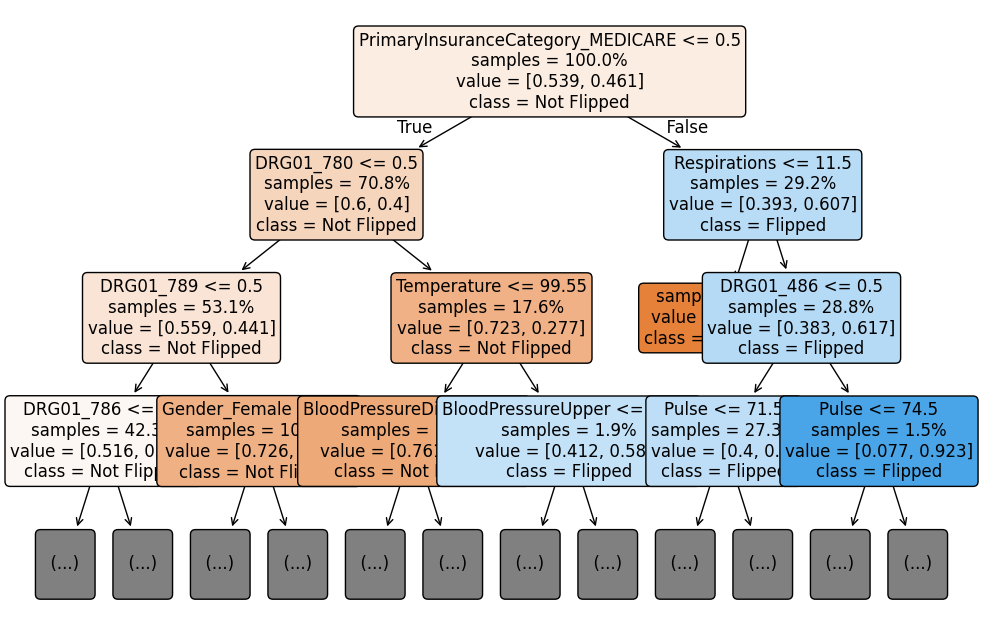

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
#plot_tree(modelTree, feature_names=features, class_names=['Not Flipped', 'Flipped'], filled=True, rounded=True)
#plt.title("Decision Tree Visualization")
plot_tree(modelTree,
          feature_names=features,
          class_names=['Not Flipped', 'Flipped'],
          filled=True,
          rounded=True,
          fontsize=12,  # Adjust fontsize for better readability
          proportion=True,  # Makes box sizes proportional to samples
          node_ids=False,  # Remove node IDs for cleaner look (optional)
          impurity=False, # Remove impurity for cleaner look (optional)
          max_depth = 3)
plt.show()

###Evaluate model performance

In [ ]:
# Predict on the test set
y_pred = modelTree.predict(X_test)
y_prob = modelTree.predict_proba(X_test)[:, 1]  # Probability of Purchase=1

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy_tree}")

# Calculate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_tree)

# Get the true positives, negatives, etc.)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity (recall)
sensitivity_tree = recall_score(y_test, y_pred)
print(f"Sensitivity: {sensitivity_tree}")

# Calculate specificity
specificity_tree = tn / (tn + fp)
print(f"Specificity: {specificity_tree}")

# Calculate precision
precision_tree = precision_score(y_test, y_pred)
print(f"Precision: {precision_tree}")

# Calculate Negative Predictive Value (NPV)
npv_tree = tn / (tn + fn)
print(f"Negative Predictive Value (NPV): {npv_tree}")

# Calculate AUC
auc_tree = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc_tree}")

# Calculate F1-score
f1_tree = f1_score(y_test, y_pred)
print(f"F1-score: {f1_tree}")

Model accuracy: 0.509090909090909
Confusion Matrix:
[[62 56]
 [52 50]]
Sensitivity: 0.49019607843137253
Specificity: 0.5254237288135594
Precision: 0.4716981132075472
Negative Predictive Value (NPV): 0.543859649122807
AUC: 0.4512296444001329
F1-score: 0.4807692307692308


####Confusion Matrix

In [ ]:
# To print a confusion matrix with totals in rows and columns:
# Convert to pandas DataFrame for easier formatting
conf_matrix_tree_df = pd.DataFrame(conf_matrix_tree,
                             index=['Actual Negative', 'Actual Positive'],
                             columns=['Predicted Negative', 'Predicted Positive'])

# Add total rows and columns
conf_matrix_tree_df['Total'] = conf_matrix_tree_df.sum(axis=1)
conf_matrix_tree_df.loc['Total'] = conf_matrix_tree_df.sum()

# Print the formatted confusion matrix
print("Confusion Matrix with Totals:")
print(conf_matrix_tree_df)

# Calculate percentage table based on total observations
total_observations = conf_matrix_tree_df.loc['Total', 'Total']  # Get total observations from the 'Total' row and column
conf_matrix_perc_tree_df = conf_matrix_tree_df.div(total_observations) * 100
conf_matrix_perc__tree_df = conf_matrix_perc_tree_df.astype(float).round(2)  # Format to 2 decimal places

# Print the percentage table
print("\nConfusion Matrix as Percentage Table (based on total observations):")
print(conf_matrix_perc_tree_df)

Output to a file. We generate a column with predicted Flipped value for each patient in the dataset, add it to the original dataframe orig_df, and export the results to a file predicted_flipped_value_tree.csv.

###Predict using model and print results to output files

In [ ]:
# Calculate predicted probabilities for all observations in df
orig_df['Predicted_Flipped_Tree'] = modelTree.predict(X) # predict value (1 or 0)

# View the first 5 rows
print("First 5 rows:")
display(orig_df.head())  # Using display for better formatting in notebooks

# View the last 3 rows
print("\nLast 3 rows:")
display(orig_df.tail(3))

# View 2 random rows
print("\n2 random rows:")
display(orig_df.sample(2))

# Output the augmented dataframe to a CSV file
orig_df.to_csv('/content/drive/My Drive/Colab Notebooks/QTM7515RL/DataVisAndPredModels/predicted_flipped_value_tree.csv', index=False)

Great job! Now you have run a supervised learning model for predicting whether or not an observation status patient will flip, have evaluated the performance of the model, and have output the results to a csv file.